In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/my.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
X = df[['delinq_2yrs','pub_rec', 'revol_bal', 'revol_util', 'days_with_cr_line', 'inq_last_6mths']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [5]:
X_scaled = scale.fit_transform(X)

In [6]:
X_new = pd.DataFrame(X_scaled, columns = [['delinq_2yrs','pub_rec', 'revol_bal', 'revol_util', 'days_with_cr_line', 'inq_last_6mths']])

In [7]:
X_new

,delinq_2yrs,pub_rec,revol_bal,revol_util,days_with_cr_line,inq_last_6mths
0,0.000000,0.0,0.023898,0.437815,0.312754,0.000000
1,0.000000,0.0,0.027848,0.644538,0.147818,0.000000
2,0.000000,0.0,0.002908,0.215126,0.259495,0.030303
3,0.000000,0.0,0.027885,0.615126,0.144379,0.030303
4,0.076923,0.0,0.003926,0.331933,0.222613,0.000000
...,...,...,...,...,...,...
9573,0.000000,0.0,0.178383,0.689916,0.589602,0.060606
9574,0.000000,0.0,0.000152,0.009244,0.240596,0.151515
9575,0.000000,0.0,0.008312,0.696639,0.187337,0.242424
9576,0.000000,0.0,0.000000,0.026891,0.092838,0.151515


In [8]:
def calculate_cibil_score(row, normalization_method="minmax"):
    """
    Calculates CIBIL score based on credit factors in a row of DataFrame.

    Args:
        row: A pandas Series containing credit factors ('delinq_2yrs', 'pub_rec', 'revol_bal', 'revol_util', 'days_with_cr_line', 'inq_last_6mths').
        normalization_method: Normalization method ("minmax" or "zscore").

    Returns:
        Calculated CIBIL score (scaled between 300 and 900).
    """

    delinq_2yrs = row['delinq_2yrs']
    pub_rec = row['pub_rec']
    revol_bal = row['revol_bal']
    revol_util = row['revol_util']
    days_with_cr_line = row['days_with_cr_line']
    inq_last_6mths = row['inq_last_6mths']



    # Example weights (adjust these weights according to your specific model)
    payment_history_weight = 0.3
    credit_utilisation_weight = 0.2
    credit_mix_duration_weight = 0.3
    enquiries_weight = 0.2

    # Calculate scores for each factor
    payment_history_score = (1 - delinq_2yrs + 1 - pub_rec) / 2
    credit_utilisation_score = (1 - revol_bal + 1 - revol_util) / 2
    credit_mix_duration_score = days_with_cr_line
    enquiries_score = 1 - inq_last_6mths

    # Calculate weighted score
    weighted_score = (payment_history_score * payment_history_weight +
                      credit_utilisation_score * credit_utilisation_weight +
                      credit_mix_duration_score * credit_mix_duration_weight +
                      enquiries_score * enquiries_weight)

    # Scale the score to the typical CIBIL score range (adjust min and max values as needed)
    cibil_score = int(300 + (weighted_score * (900 - 300)))

    return cibil_score




In [9]:
X_new['cibil_score'] = X_new.apply(lambda row: calculate_cibil_score(row), axis=1)


In [10]:
X_new

,delinq_2yrs,pub_rec,revol_bal,revol_util,days_with_cr_line,inq_last_6mths,cibil_score
0,0.000000,0.0,0.023898,0.437815,0.312754,0.000000,748
1,0.000000,0.0,0.027848,0.644538,0.147818,0.000000,706
2,0.000000,0.0,0.002908,0.215126,0.259495,0.030303,749
3,0.000000,0.0,0.027885,0.615126,0.144379,0.030303,703
4,0.076923,0.0,0.003926,0.331933,0.222613,0.000000,732
...,...,...,...,...,...,...,...
9573,0.000000,0.0,0.178383,0.689916,0.589602,0.060606,766
9574,0.000000,0.0,0.000152,0.009244,0.240596,0.151515,744
9575,0.000000,0.0,0.008312,0.696639,0.187337,0.242424,682
9576,0.000000,0.0,0.000000,0.026891,0.092838,0.151515,716


In [11]:
X = X_new.drop(['cibil_score'], axis = 1)

<ipython-input-11-ea77b7c7f201>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = X_new.drop(['cibil_score'], axis = 1)


In [12]:
y = X_new['cibil_score']

In [13]:
X_new.corr()

,delinq_2yrs,pub_rec,revol_bal,revol_util,days_with_cr_line,inq_last_6mths,cibil_score
delinq_2yrs,1.000000,0.009184,-0.033243,-0.042740,0.081374,0.021245,-0.039015
pub_rec,0.009184,1.000000,-0.031010,0.066717,0.071826,0.072673,-0.140829
revol_bal,-0.033243,-0.031010,1.000000,0.203779,0.229344,0.022394,0.042726
revol_util,-0.042740,0.066717,0.203779,1.000000,-0.024239,-0.013880,-0.499312
days_with_cr_line,0.081374,0.071826,0.229344,-0.024239,1.000000,-0.041736,0.811137
inq_last_6mths,0.021245,0.072673,0.022394,-0.013880,-0.041736,1.000000,-0.298127
cibil_score,-0.039015,-0.140829,0.042726,-0.499312,0.811137,-0.298127,1.000000


In [14]:
X_new.shape

(9578, 7)

In [15]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [18]:
regressor.fit(X_train, y_train)

<ipython-input-18-cb9aa30858d7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
from  sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9765605887055799


In [21]:
train_r2 = regressor.score(X_train, y_train)
print(f'Training R-squared: {train_r2}')

Training R-squared: 0.9961433406488461


In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')
print(f'Average Cross-Validation R-squared score: {cv_scores.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Cross-Validation R-squared scores: [0.98412438 0.98917342 0.99099142 0.98729108 0.76287646]
Average Cross-Validation R-squared score: 0.942891353501661


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [23]:
import pickle

In [ ]:
with open("model_1.pkl", "wb") as f:
    pickle.dump(regressor, f)

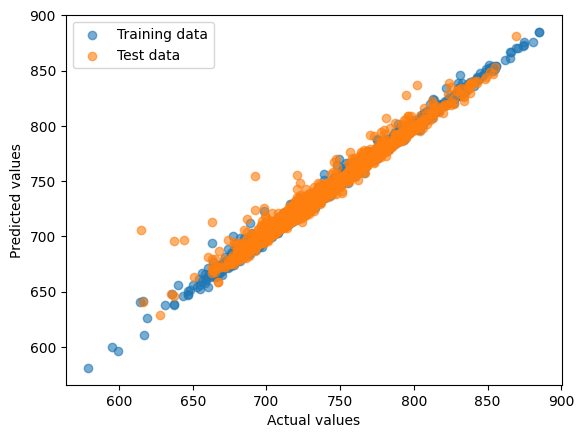

In [ ]:
import matplotlib.pyplot as plt
y_train_pred = regressor.predict(X_train)
plt.scatter(y_train, y_train_pred, label='Training data', alpha=0.6)
plt.scatter(y_test, y_pred, label='Test data', alpha=0.6)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [24]:
X_test

,delinq_2yrs,pub_rec,revol_bal,revol_util,days_with_cr_line,inq_last_6mths
8558,0.000000,0.0,0.007077,0.690756,0.207952,0.090909
4629,0.000000,0.0,0.013204,0.343697,0.195925,0.090909
1383,0.000000,0.0,0.011723,0.721008,0.108298,0.000000
8142,0.076923,0.0,0.006498,0.216807,0.360866,0.121212
1768,0.076923,0.0,0.000388,0.060504,0.278394,0.030303
...,...,...,...,...,...,...
8688,0.000000,0.0,0.011880,0.353782,0.122043,0.060606
981,0.000000,0.0,0.002400,0.347899,0.073936,0.000000
6318,0.000000,0.0,0.000000,0.442857,0.087686,0.030303
1407,0.000000,0.0,0.028629,0.750420,0.180462,0.030303


In [ ]:
X_n = np.array([
    [0.000000,	0.0,	0.007077,	0.690756,	0.207952,	0.090909],
    [1, 1, 9000, 65.0, 1800, 2]
    # Add more rows as needed
])

In [ ]:
y_new_pred = regressor.predict(X_n)
print(f'Predictions on new data: {y_new_pred}')

Predictions on new data: [701.7 816.9]


In [ ]:
import joblib

In [ ]:
joblib.dump(regressor, 'model_3.joblib')

['model_3.joblib']

In [25]:
X_test.to_csv('file1.csv')

In [ ]:
## No. of dependents
## Education
## Self employed
## Income anum
## Loan amount - kitna chahiye
## Loan Term - no. of days
## CIBIL Score

## Loan status - eligible or not  - to be predicted
